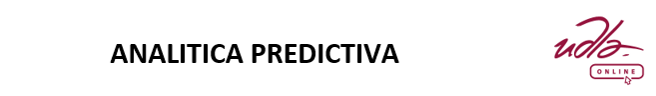

Tema: TRABAJO FINAL CASO DE ESTUDIO WALMART

Integrantes:

Andrés Sebastián Bernal Troya

Dayana Celeste Andino Vásquez

Diego Fernando Barros Tuapante

Jairo Daniel Herrera Montes

Roberto Javier Aguirre Padilla

##***1. Importe la base de datos en Jupyter Notebook con pandas.***

In [ ]:
# Importar los modules requeridos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leer base de datos con pandas

df=pd.read_csv("/content/drive/MyDrive/Walmart(1).csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


##***2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención?***

In [ ]:
df.rename({'Store':'Numero_de_tienda', 'Date': 'Semana_de_Ventas', 'Weekly_Sales':'Ventas_Semanales', 'Holiday_Flag': 'Tipo_Feriado', 'Temperature':'Temperatura_Dia',
          'Fuel_Price':'Costo_combustible_region', 'CPI': 'IPC', 'Unemployment':'Tasa_Desempleo'}, axis=1, inplace=True)

In [ ]:
df

,Numero_de_tienda,Semana_de_Ventas,Ventas_Semanales,Tipo_Feriado,Temperatura_Dia,Costo_combustible_region,IPC,Tasa_Desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
num_vars = df.select_dtypes(include=[np.number]).columns.tolist()
cat_vars = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Variables numéricas:", num_vars)
print("Variables categóricas:", cat_vars)
df.describe()

Variables numéricas: ['Numero_de_tienda', 'Ventas_Semanales', 'Tipo_Feriado', 'Temperatura_Dia', 'Costo_combustible_region', 'IPC', 'Tasa_Desempleo']
Variables categóricas: ['Semana_de_Ventas']


,Numero_de_tienda,Ventas_Semanales,Tipo_Feriado,Temperatura_Dia,Costo_combustible_region,IPC,Tasa_Desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Se observa que las variables numéricas tienen sus registros completos a 6435, es decir no hay presencia de valores perdidos. El número de tiendas puede ir desde 1 hasta 45 tiendas en las regiones analizadas. Hay una variabilidad considerable en ventas semanales, (desviación estándar de 564366.6), lo que sugiere que las ventas pueden variar significativamente de una semana a otra. El tipo de feriado, es una variable binomial, pues se observa que al 75% de los datos predomina el valor de cero, indicando que en su mayoria son semanas no festivas. Esto sugiere que los días festivos (valor de 1) son relativamente raros en el conjunto de datos. La temperatura tambien es bastante variable ya que puede fluctuar con días demasiados fríos alcanzando un mínimo de -2.06 grados y hasta mucho calor de 100.14 grados. Para el IPC, una desviación estándar de 39.36, indica diferencias significativas a lo largo del tiempo, lo que puede reflejar cambios económicos en las decisiones de consumo. De igual manera sucede con la tasa de Desempleo, el promedio es del 8% con una desviación estándar de 1.88, pudiendo reflejar diferentes condiciones económicas.

La variable: "Tipo_Feriado", tiene sus valores mínimos en cero, se pensaria que son variables discretas las cuales solo pueden tener valores no negativos, debemos analizar esta variable

In [ ]:
frecuencia_absoluta = df['Tipo_Feriado'].value_counts().sort_index()

# Calcular la frecuencia relativa
frecuencia_relativa = df['Tipo_Feriado'].value_counts(normalize=True).sort_index()

# Crear un DataFrame con ambas frecuencias
tabla_frecuencias = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_absoluta,
    'Frecuencia Relativa': frecuencia_relativa
    })
# Añadir una columna con la frecuencia relativa en porcentaje
tabla_frecuencias['Frecuencia Relativa (%)'] = tabla_frecuencias['Frecuencia Relativa'] * 100

print(tabla_frecuencias)

              Frecuencia Absoluta  Frecuencia Relativa  \
Tipo_Feriado                                             
0                            5985              0.93007   
1                             450              0.06993   

              Frecuencia Relativa (%)  
Tipo_Feriado                           
0                           93.006993  
1                            6.993007  


Para esta variable, el 93.00% de los datos se encuentra en cero. Dado que la mayoría de las semanas son no festivas, esto podría hacer que cualquier análisis que compare ventas o cualquier otra métrica entre días festivos y no festivos esté sesgado. Las conclusiones podrían no ser representativas si los datos de los días festivos son subrepresentados. No se le aplicaria la correccion de datos extremos.

In [ ]:
# Descriptivos para Variables Categóricas
df.describe(include = 'object')

,Semana_de_Ventas
count,6435
unique,143
top,05-02-2010
freq,45


 No existen registros en nuestras variables categóricas con observaciones como 0 para pensar que alguna semana de ventas no tiene fecha registrada, además esta es una variable de tiempo.



##***3. Evalúe si la base contiene datos perdidos.***

In [ ]:
df.isna().sum()

Numero_de_tienda            0
Semana_de_Ventas            0
Ventas_Semanales            0
Tipo_Feriado                0
Temperatura_Dia             0
Costo_combustible_region    0
IPC                         0
Tasa_Desempleo              0
dtype: int64

No hay datos perdidos en ninguna variable del caso de estudio de Walmart

##***4. Evalúe si la base contiene datos atipicos De ser el caso, detalle cuales y que metodo estadistico aplicaran para corregir.***

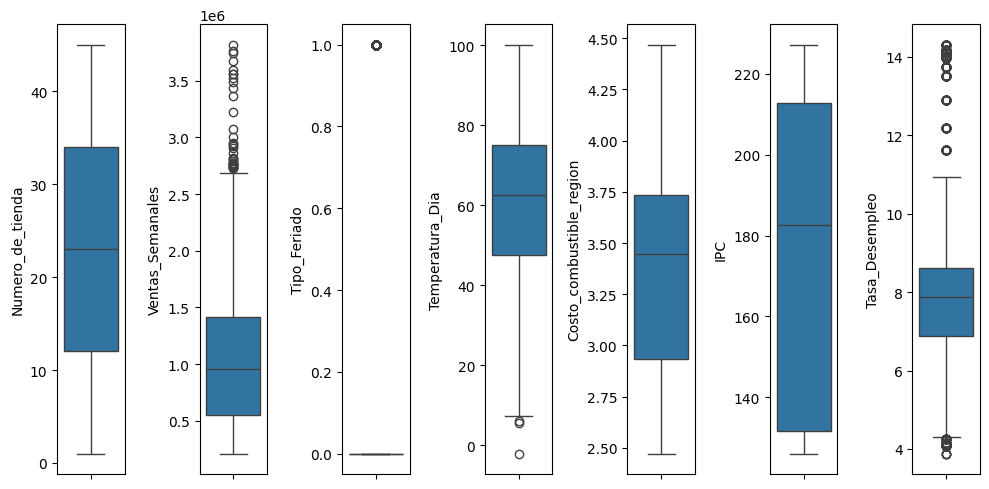

In [ ]:
# Identificación de valores atípicos por Gráfico Box Plot

fig, axs = plt.subplots(1,7, figsize = (10,5))
plt1 = sns.boxplot(df['Numero_de_tienda'], ax = axs[0])
plt2 = sns.boxplot(df['Ventas_Semanales'], ax = axs[1])
plt3 = sns.boxplot(df['Tipo_Feriado'], ax = axs[2])
plt4 = sns.boxplot(df['Temperatura_Dia'], ax = axs[3])
plt5 = sns.boxplot(df['Costo_combustible_region'], ax = axs[4])
plt6 = sns.boxplot(df['IPC'], ax = axs[5])
plt7 = sns.boxplot(df['Tasa_Desempleo'], ax = axs[6])

plt.tight_layout()

Según los gráficos de box plot existen valores atipicos por afuera de los rangos cuartílicos para las variables "Ventas Semanales", "Tasa de desempleo" y "Temperatura". La variable "Tipo feriado" muestra como solo toma dos valores y como se mencionó se concentra casi en su totalidad en cero, por lo que dada su naturaleza de ser una variable categórica discreta no se le aplica ningún tratamiento

In [ ]:
# Identificación de valores atípicos (outliers)
valores_atipicos = {}

variables_numericas = df.select_dtypes(include=['number']).columns

for columna in variables_numericas:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    valores_atipicos[columna] = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)][columna].count()
print("Valores Atípicos:\n", valores_atipicos)

Valores Atípicos:
 {'Numero_de_tienda': 0, 'Ventas_Semanales': 34, 'Tipo_Feriado': 450, 'Temperatura_Dia': 3, 'Costo_combustible_region': 0, 'IPC': 0, 'Tasa_Desempleo': 481}


La variable con menor número de atipicos es temperatura, presenta solo 3 valores, mientras que la tasa de desempleo es la mayor con 481 valores.

In [ ]:
## Corrección de valores extremos

 # Aplicar winsorización para tratar los valores atípicos (outliers)
from scipy.stats.mstats import winsorize

df['Ventas_Semanales'] = winsorize(df['Ventas_Semanales'], limits=[0.01, 0.01])
df['Temperatura_Dia'] = winsorize(df['Temperatura_Dia'], limits=[0.01, 0.01])
df['Tasa_Desempleo'] = winsorize(df['Tasa_Desempleo'], limits=[0.1, 0.1])

valores_atipicos_despues = {}
for columna in variables_numericas:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    valores_atipicos_despues[columna] = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)][columna].count()

print("Valores Atípicos Después de la Corrección:\n", valores_atipicos_despues)

Valores Atípicos Después de la Corrección:
 {'Numero_de_tienda': 0, 'Ventas_Semanales': 0, 'Tipo_Feriado': 450, 'Temperatura_Dia': 0, 'Costo_combustible_region': 0, 'IPC': 0, 'Tasa_Desempleo': 0}


Las variables ventas semanales y temperatura reemplazaron sus valores extremos con los percentiles mas cercanos al 1%, mientras que para la tasa de desempleo fue necesario un limite del 10%.

## ***5. Grafique las distribuciones de las variables y a priori comente sobre ellas.***

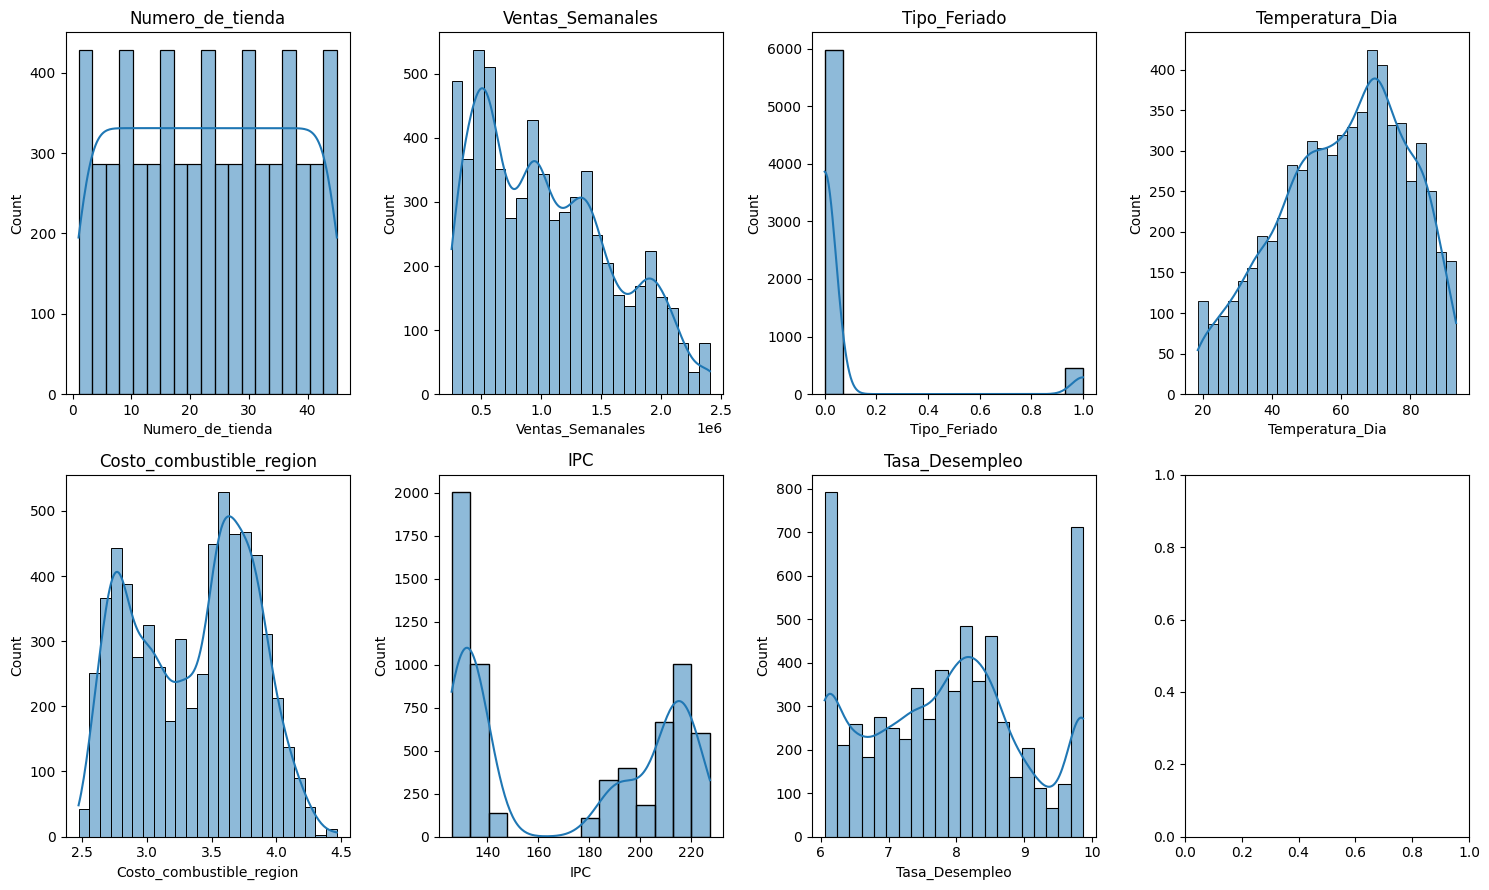

In [ ]:
# Graficar distribuciones de las variables numéricas
figura, ejes = plt.subplots(2, 4, figsize=(15, 9))

sns.histplot(df['Numero_de_tienda'], kde=True, ax=ejes[0, 0])
ejes[0, 0].set_title('Numero_de_tienda')
sns.histplot(df['Ventas_Semanales'], kde=True, ax=ejes[0, 1])
ejes[0, 1].set_title('Ventas_Semanales')
sns.histplot(df['Tipo_Feriado'], kde=True, ax=ejes[0, 2])
ejes[0, 2].set_title('Tipo_Feriado')
sns.histplot(df['Temperatura_Dia'], kde=True, ax=ejes[0, 3])
ejes[0, 3].set_title('Temperatura_Dia')
sns.histplot(df['Costo_combustible_region'], kde=True, ax=ejes[1, 0])
ejes[1, 0].set_title('Costo_combustible_region')
sns.histplot(df['IPC'], kde=True, ax=ejes[1, 1])
ejes[1, 1].set_title('IPC')
sns.histplot(df['Tasa_Desempleo'], kde=True, ax=ejes[1, 2])
ejes[1, 2].set_title('Tasa_Desempleo')

plt.tight_layout()
plt.show()

**Variables númericas:**

- Variable Numero de tienda: La distribución la variable numero de tienda indica una campana es decir una distribución gaussiana.La gráfica es simétrica respecto a la media. Esto significa que la mitad izquierda de la gráfica es un reflejo de la mitad derecha.

- Ventas semanales: La distribución de la variable ventas semanales parece tener varios picos, lo que indica cambios en el número de ventas durante el período de recopilación de datos desde el 2010 a 2012.

- Tipo_feriado: Se nota una caida significativa indicando los dias libres o dias feriados que son superbolw, dia del trabajo, dia de acción de gracias y navidad.

- Temperatura_dia: La distribución de la temperatura del dia es un indicativo de que los datos se están acercando a una distribución normal, pero no lo han alcanzado del todo.

- Costo combustible_region: La distribución de esta variable con picos altos indican que hay una gran concentración de datos en esos puntos específicos, lo que puede ser importante para entender dónde se agrupan las observaciones.

- IPC: La distribución de la tasa de variación del empleo muestra varios picos, lo que sugiere que la tasa ha fluctuado durante el período de recopilación de datos.

- Tasa_desempleo La distribución tasa desempleo presenta una asimetria a la derecha lo que indica que se ha reducido el numero de personas desempleadas


**Variable categórica:**

In [ ]:
frecuencia_absoluta = df['Semana_de_Ventas'].value_counts().sort_index()

# Calcular la frecuencia relativa
frecuencia_relativa = df['Semana_de_Ventas'].value_counts(normalize=True).sort_index()

# Crear un DataFrame con ambas frecuencias
tabla_frecuencias = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_absoluta,
    'Frecuencia Relativa': frecuencia_relativa
    })
# Añadir una columna con la frecuencia relativa en porcentaje
tabla_frecuencias['Frecuencia Relativa (%)'] = tabla_frecuencias['Frecuencia Relativa'] * 100

print(tabla_frecuencias)

                  Frecuencia Absoluta  Frecuencia Relativa  \
Semana_de_Ventas                                             
01-04-2011                         45             0.006993   
01-06-2012                         45             0.006993   
01-07-2011                         45             0.006993   
01-10-2010                         45             0.006993   
02-03-2012                         45             0.006993   
...                               ...                  ...   
30-07-2010                         45             0.006993   
30-09-2011                         45             0.006993   
30-12-2011                         45             0.006993   
31-08-2012                         45             0.006993   
31-12-2010                         45             0.006993   

                  Frecuencia Relativa (%)  
Semana_de_Ventas                           
01-04-2011                       0.699301  
01-06-2012                       0.699301  
01-07-2011       

Las frecuencias absolutas como relativas poseen los mismo valores, mostrando que la fecha para cada semana de ventas esta completa y debidamente registrada. Dado que esta es una variable temporal no se la utilizará en el modelo como variable predictora, sin embargo se la usará como fecha en caso de modelar bajo series de tiempo.

## ***6. Obtenga las correlaciones entre los datos de corte numérico.***

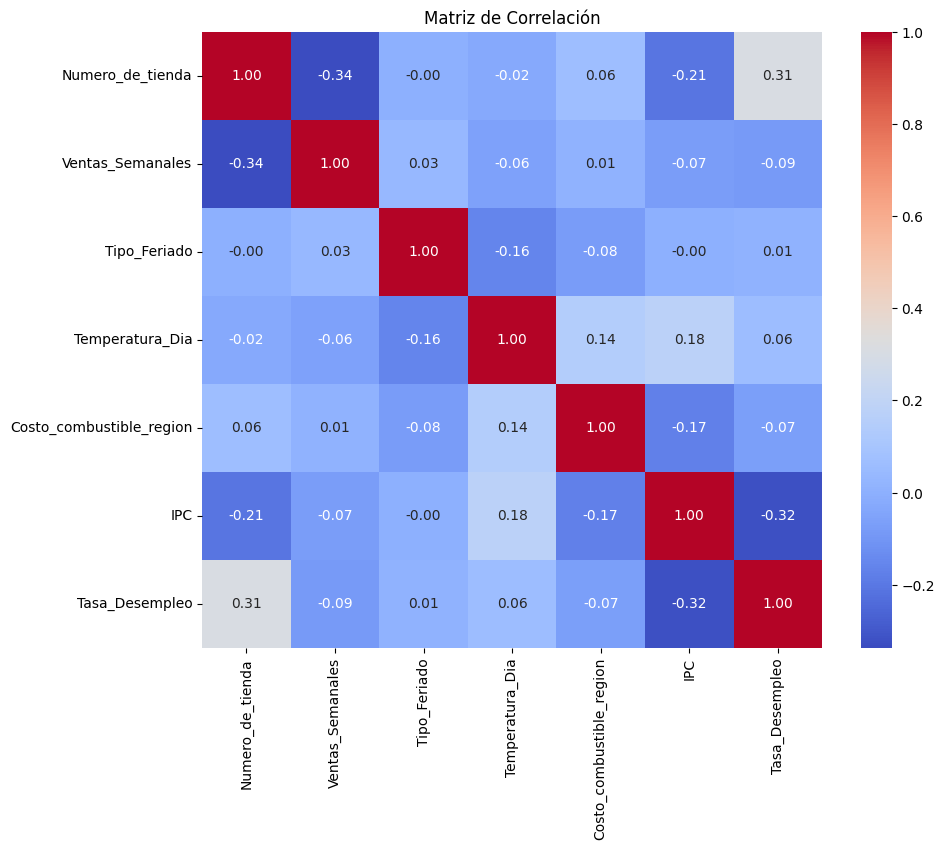

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Graficar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

La matriz de correlaciones muestra asociaciones lineales tanto positivas como negativas, encontrándose estas en el rango de correlación débil (0.25 < 0.50), incluso con asociaciones no considerables. La variable "Tipo_feriado" no se la interpreta ya que es una variable dicotómica.

# **7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.**

La variable dependiente a escoger será "Ventas_Semanales" ya que es la variable de interés principal para el negocio, es decir, el objetivo es entender y predecir las ventas semanales de las tiendas Walmart.

Las variables independientes candidatas para el modelo son:
* Número_de_tienda: Podría ser relevante si existen diferencias significativas en las ventas entre las distintas tiendas.
* Tipo_Feriado: Es probable que las ventas se vean afectadas por la presencia de días festivos.
* Temperatura_Dia: La temperatura podría influir en las ventas, especialmente en ciertos tipos de productos.
* Costo_combustible_region: El costo del combustible puede afectar el comportamiento de compra de los clientes.
* IPC: El Índice de Precios al Consumidor podría reflejar la inflación y afectar el poder adquisitivo de los clientes.
* Tasa_Desempleo: La tasa de desempleo podría estar relacionada con la capacidad de gasto de los consumidores.

Es importante tener en cuenta que la correlación no implica causalidad.
Antes de incluir estas variables en el modelo, se deben realizar análisis adicionales como:
* Gráficos de dispersión para identificar relaciones no lineales.
* Pruebas de hipótesis para evaluar la significancia estadística de las relaciones.
* Considerar la posibilidad de interacciones entre las variables.

Además, es posible que se requiera la transformación de algunas variables para mejorar el ajuste del modelo.


**Gráfico de Correlaciones con nuestra variable dependiente:**

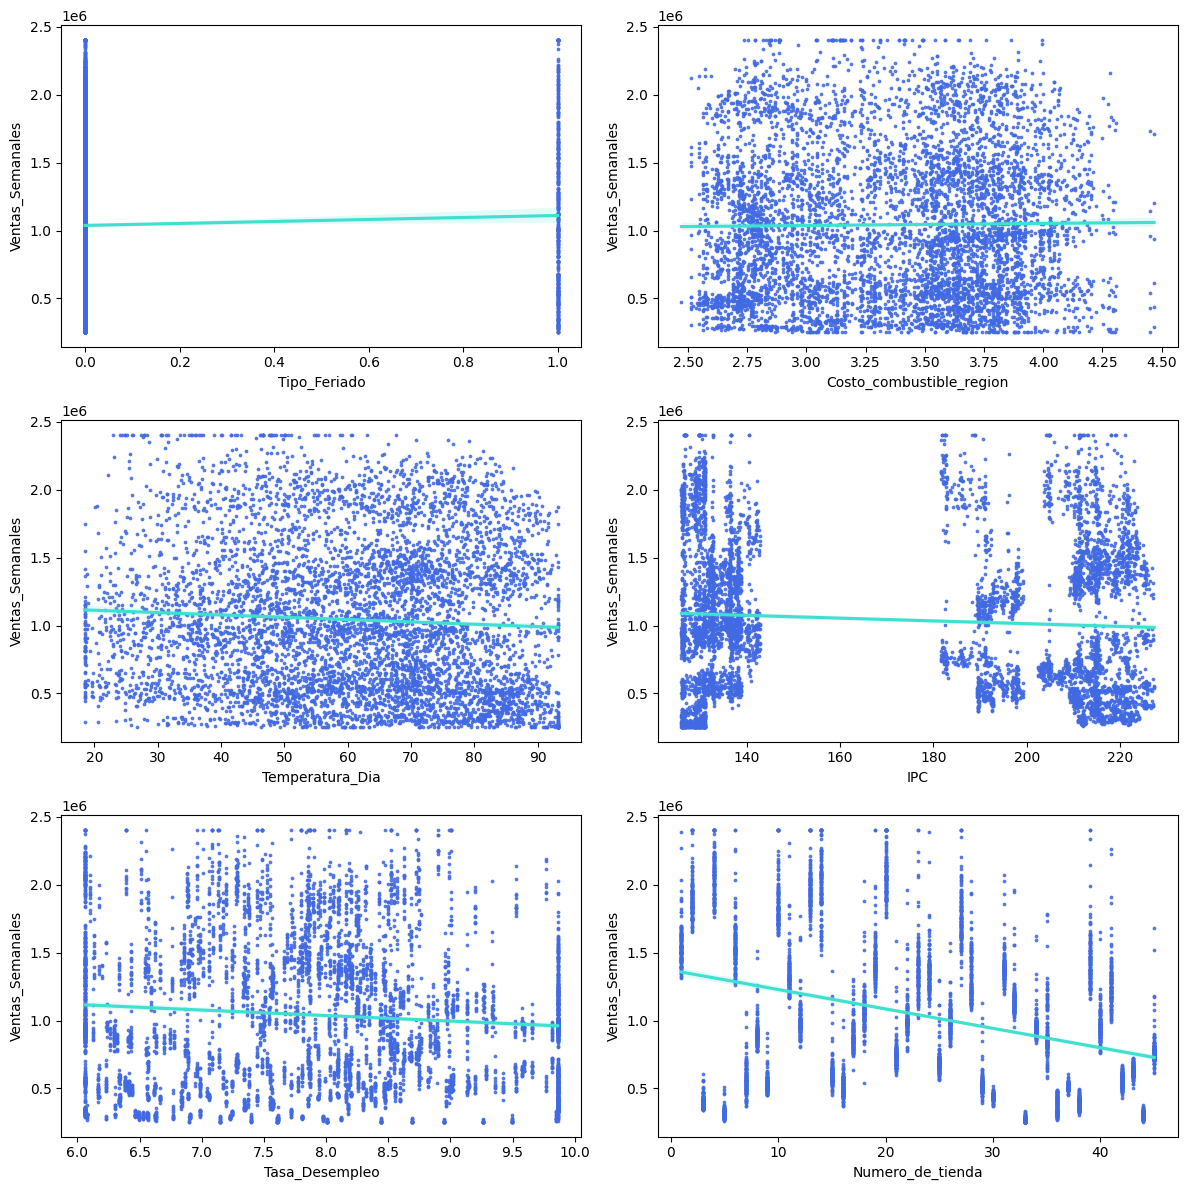

In [ ]:
# Número de las variables
n = 7
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr = numerical_df.corr()
#
cols = corr.nlargest(7, "Ventas_Semanales")["Ventas_Semanales"].index
# Calculate correlation
for i in np.arange(1,7):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['Ventas_Semanales'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

Podemos observar que la relación de asociación líneal de nuetras predictoras con la variable objetivo no se adapta bien en ninguno de los casos, ya que los datos están muy dipersos, indicando la razon de los bajos coeficientes hallados en la matriz de correlaciones, es por ello que modelar bajo un enfoque de regresión lineal no sería el más adecuado.

## ***8. Indique que tipo de modelación realizarán y porqué.***

**Comprobemos lo dicho ejecutando una regresión lineal:**

In [ ]:
print(df.dtypes)

Numero_de_tienda              int64
Semana_de_Ventas             object
Ventas_Semanales            float64
Tipo_Feriado                  int64
Temperatura_Dia             float64
Costo_combustible_region    float64
IPC                         float64
Tasa_Desempleo              float64
dtype: object


In [ ]:
df['Tipo_Feriado'] = df['Tipo_Feriado'].astype('object')

In [ ]:
Modelo_1 = ols("Ventas_Semanales ~ Tasa_Desempleo + Numero_de_tienda + IPC + Temperatura_Dia + Costo_combustible_region + Tipo_Feriado ", data=df)
results_1 = Modelo_1.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:       Ventas_Semanales   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     171.8
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          2.34e-203
Time:                        18:46:24   Log-Likelihood:                -93718.
No. Observations:                6435   AIC:                         1.875e+05
Df Residuals:                    6428   BIC:                         1.875e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Como lo veniamos mencionando, el bajo grado de asociación lineal con nuestra variable predicha genera una bondad de ajuste de apenas el 13.7%, es decir nuetras predictoras explican menos del 15% de la variabilidad de las Ventas semanales, por lo tanto no es un modelo adecuado.

Dado que tenemos, el registro de fecha de cada semana de las ventas de la cadena Walmart, es posible analizar las ventas semanales en el tiempo del periodo dado, con el fin de encontrar patrones en la serie.

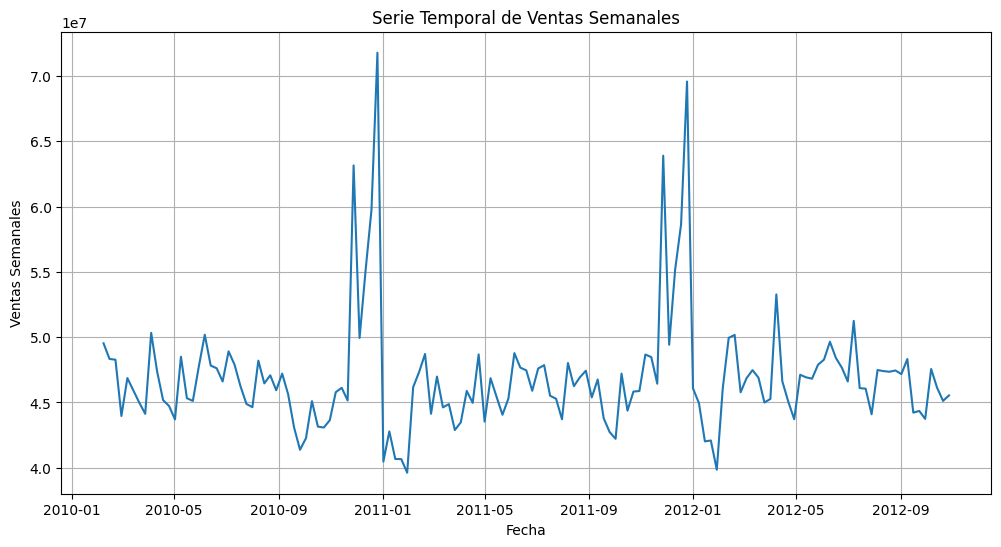

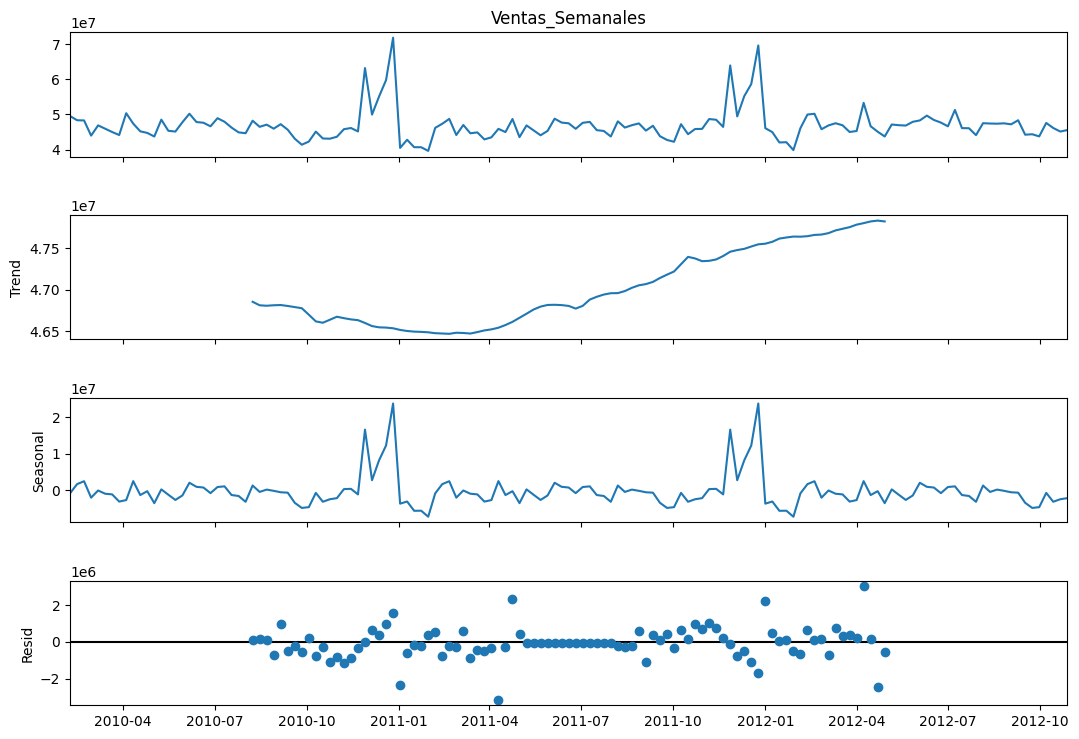

In [ ]:
# Convertir la columna 'Semana_de_Ventas' a datetime
df['Semana_de_Ventas'] = pd.to_datetime(df['Semana_de_Ventas'], format='%d-%m-%Y')

# Ordenar el DataFrame por fecha
df = df.sort_values('Semana_de_Ventas')

# Resample the data to a weekly frequency and sum the sales for each week
ventas_serie = df.resample('W', on='Semana_de_Ventas')['Ventas_Semanales'].sum()

# Graficar la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(ventas_serie)
plt.xlabel('Fecha')
plt.ylabel('Ventas Semanales')
plt.title('Serie Temporal de Ventas Semanales')
plt.grid(True)
plt.show()

# Descomposición de la serie temporal
from statsmodels.tsa.seasonal import seasonal_decompose

descomposicion = seasonal_decompose(ventas_serie, model='additive') # Now it knows the frequency

# Graficar la descomposición
fig = descomposicion.plot()
fig.set_size_inches(12, 8)
plt.show()


Conclusiones sobre la viabilidad de un modelo de series de tiempo:
1. Tendencia: La gráfica de la serie temporal muestra una clara tendencia a lo largo del tiempo, lo que sugiere que un modelo de series de tiempo podría ser adecuado.
2. Estacionalidad: La descomposición de la serie temporal revela una componente estacional, lo que indica patrones recurrentes en las ventas, pareciendo ubicarse estos especialmente en las últimas semanas del año. Esto refuerza la idea de utilizar un modelo de series de tiempo.
3. Estacionariedad: La prueba de Augmented Dickey-Fuller (ADF) puede ayudar a determinar si la serie temporal es estacionaria. Si el valor p es menor que un nivel de significancia (por ejemplo, 0.05), se puede rechazar la hipótesis nula de no estacionariedad, lo que indicaría que la serie es estacionaria. Si la serie no es estacionaria, es posible que se requieran transformaciones (como diferenciación) antes de aplicar un modelo de series de tiempo.
4. Otras variables: Además de la serie temporal de ventas, el conjunto de datos contiene otras variables que podrían ser relevantes para predecir las ventas. Un modelo de series de tiempo puede incorporar estas variables como regresores externos para mejorar la precisión de las predicciones.


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prueba de estacionariedad (Augmented Dickey-Fuller Test)

resultado_adf = adfuller(ventas_serie)
print('Estadístico ADF:', resultado_adf[0])
print('Valor p:', resultado_adf[1])
print('Valores críticos:', resultado_adf[4])

# Diferenciación de la serie para lograr estacionariedad si es necesario

if resultado_adf[1] > 0.05:  # Si la serie no es estacionaria
    ventas_serie_diff = ventas_serie.diff().dropna()
    resultado_adf_diff = adfuller(ventas_serie_diff)
    print('\nResultados de la prueba ADF después de la diferenciación:')
    print('Estadístico ADF:', resultado_adf_diff[0])
    print('Valor p:', resultado_adf_diff[1])
    print('Valores críticos:', resultado_adf_diff[4])
else:
    ventas_serie_diff = ventas_serie  # La serie ya es estacionaria

Estadístico ADF: -6.236410131617518
Valor p: 4.813554284456099e-08
Valores críticos: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}


La prueba ADF se utiliza para determinar si una serie temporal es estacionaria, es decir, si sus propiedades estadísticas (media, varianza, autocorrelación) permanecen constantes en el tiempo. La hipótesis nula de la prueba ADF es que la serie temporal no es estacionaria. En este caso, el valor p obtenido en la prueba ADF es menor que el nivel de significancia (0.05), lo que nos permite rechazar la hipótesis nula y concluir que la serie temporal de ventas semanales es estacionaria. Esto significa que podemos aplicar modelos de series de tiempo como ARMA o SARMA sin necesidad de realizar transformaciones adicionales para lograr estacionariedad.

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

# Create an auto ARIMA model
model = auto_arima(ventas_serie, seasonal=False, suppress_warnings=True, error_action="ignore")

# Print the model summary
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -2383.342
Date:                Wed, 07 Aug 2024   AIC                           4774.684
Time:                        18:46:47   BIC                           4786.536
Sample:                    02-07-2010   HQIC                          4779.500
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.534e+07   1.08e-09   2.35e+16      0.000    2.53e+07    2.53e+07
ar.L1          0.3267      0.052      6.246      0.000       0.224       0.429
ar.L2          0.1334      0.055      2.431      0.0

La función "Auto-arima" nos indica que el orden para modelar la serie de ventas semanales es (2, 0, 0), es decir se necesitan 2 rezagos de las ventas semanales para explicar las ventas en el presente.

In [ ]:
# Explorar modelos ARIMA y ajustarlo un modelo ARIMA(p, d, q)
# Los valores de p, d y q se pueden determinar mediante la función auto_arima o mediante análisis de autocorrelación y autocorrelación parcial (ACF y PACF)
modelo_arima = ARIMA(ventas_serie, order=(2, 0, 0))
resultados_arima = modelo_arima.fit()
print(resultados_arima.summary())

# Explorar modelos SARIMA, ajustar un modelo SARIMA(p, d, q)(P, D, Q, s)
# Los valores de p, d, q, P, D, Q y s se pueden determinar mediante análisis de autocorrelación y autocorrelación parcial (ACF y PACF) y conocimiento de la estacionalidad de los datos
modelo_sarima = SARIMAX(ventas_serie, order=(2, 0, 0), seasonal_order=(1, 0, 0, 52))
resultados_sarima = modelo_sarima.fit()
print(resultados_sarima.summary())

                               SARIMAX Results                                
Dep. Variable:       Ventas_Semanales   No. Observations:                  143
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2383.342
Date:                Wed, 07 Aug 2024   AIC                           4774.683
Time:                        18:46:47   BIC                           4786.535
Sample:                    02-07-2010   HQIC                          4779.499
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.693e+07   1.48e-09   3.16e+16      0.000    4.69e+07    4.69e+07
ar.L1          0.3255      0.051      6.339      0.000       0.225       0.426
ar.L2          0.1314      0.076      1.720      0.0

**Comentarios sobre los resultados de ARIMA:**

El modelo ARIMA(2, 0, 0) indica que se utilizan 2 términos autorregresivos (AR), 0 término de diferenciación (I) y 0 términos de media móvil (MA) para modelar la serie temporal.
El resumen del modelo proporciona información sobre los coeficientes estimados, los errores estándar, los valores p y otras estadísticas relevantes.

**Comentarios sobre los resultados de SARIMA:**

El modelo SARIMA(2, 0, 0)(1, 0, 0, 52) incluye componentes estacionales además de los componentes autorregresivos, de diferenciación y de media móvil.
El término (1, 0, 0, 52) indica que se utiliza un término autorregresivo estacional,  cero términos de diferenciación estacional y término de media móvil estacional, con una frecuencia estacional de 52 (semanas en un año).


## ***9. Verifique los supuestos, de haber escogido el enfoque econométrico***

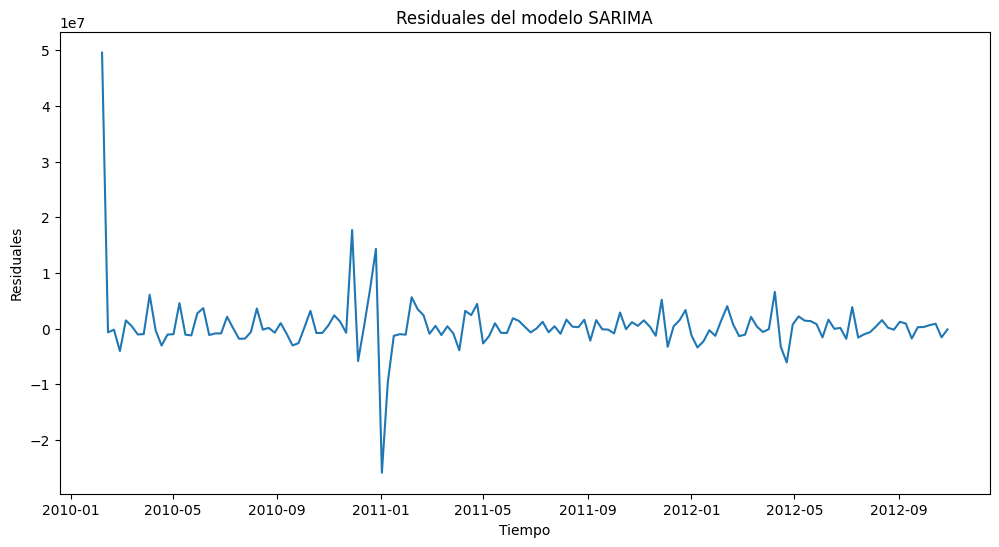

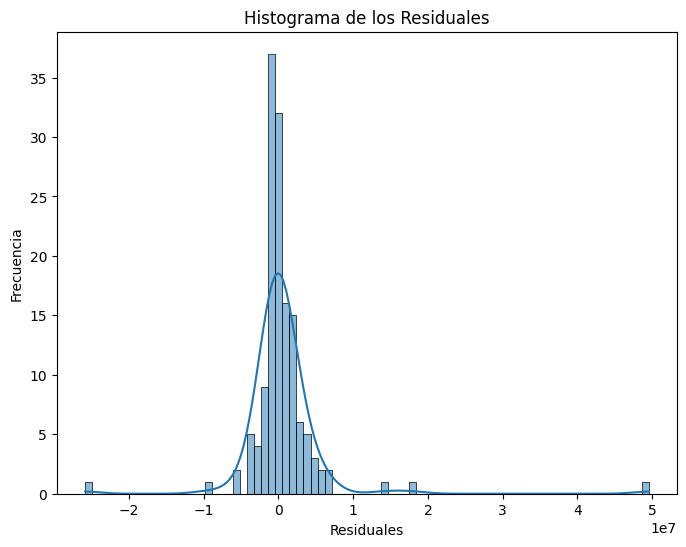

Estadístico Jarque-Bera: 12750.629834541667
Valor p: 0.0


In [ ]:
# Verificamos los supuestos del modelo SARIMA

# Residuales del modelo
residuales = resultados_sarima.resid

# Gráfico de los residuales
plt.figure(figsize=(12,6))
plt.plot(residuales)
plt.title('Residuales del modelo SARIMA')
plt.xlabel('Tiempo')
plt.ylabel('Residuales')
plt.show()

# Histograma de los residuales
plt.figure(figsize=(8,6))
sns.histplot(residuales, kde=True)
plt.title('Histograma de los Residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.show()

# Prueba de normalidad de los residuales (Jarque-Bera)
from scipy.stats import jarque_bera
jb_test = jarque_bera(residuales)
print('Estadístico Jarque-Bera:', jb_test[0])
print('Valor p:', jb_test[1])


El gráfico de residuales muestra como estos oscilan alrededor de cero aunque hay dos picos, uno al principio de la serie y otro cerca de la semana 1 del año 2011, además la varianza parece ser constante en la mayor parte de la serie. Por otra parte, el histograma de los residuos se parece a una distribución gaussiana aunque la cola derecha se extiende ligeramente. La prueba de normalidad de los residuos de Jarque-Bera nos da un valor p de 0 lo que indica un rechazo de la hipotesis nula, es decir se rechaza la normalidad de los residuos.

Estadístico Ljung-Box: 9.627172001219368
Valor p: 0.47378852068630395


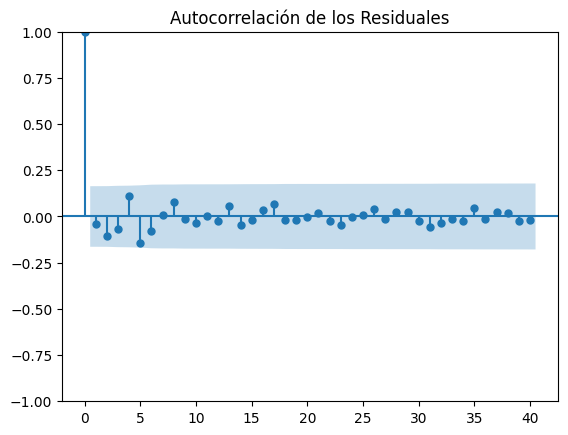

In [ ]:
# Prueba de autocorrelación de los residuales (Ljung-Box)
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuales, lags=[10])  # Ajusta el número de lags según sea necesario
print('Estadístico Ljung-Box:', lb_test['lb_stat'][10]) # Access the test statistic for lag 10
print('Valor p:', lb_test['lb_pvalue'][10]) # Access the p-value for lag 10

# Gráfico de autocorrelación de los residuales
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuales, lags=40)  # Ajusta el número de lags según sea necesario
plt.title('Autocorrelación de los Residuales')
plt.show()

En cuanto a la autocorrelación residual, observamos que los retardos no se salen del intervalo de confianza y parecen oscilar hasta el punto cero. Esto nos inidca que aparentemente no existe autocorrelación serial en los residuos. El estadístico de Ljung-Box así lo demuestra, pues el valor p es de 0.47 que es mayor a 0.05, indicando una aceptación de la hipótesis nula, es decir los residuos no presentan autocorrelación (hasta el retardo k).

## ***10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.***

Dado que nuestro modelo SARIMA(2, 0, 0)(1, 0, 0, 52), obtuvo coeficientes estadísticamente significativos y los criterios BIC y AIC son los menores, elegiremos a este modelo como definitivo.

Cabe recalcar que el modelo SARIMA normal no permite incluir mas variables explicativas, por ello el modelo SARIMAX es una opción ya que aparte de incluir los componentes autorregresivos y autorregresivos estacionales, puede incorporar mas variables explicativas, sin embargo, esto se probo y resulto que ninguna variable explicativa es significativa por lo que no tiene sentido incluirlas en el modelo.

**MODELO DEFINITIVO:**

In [ ]:
# Cambiamos a numerico para poder correr el modelo
df['Tipo_Feriado'] = pd.to_numeric(df['Tipo_Feriado'], errors='coerce')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
modelo_sarima = SARIMAX(ventas_serie, order=(2, 0, 0), seasonal_order=(1, 0, 0, 52))
resultados_sarima = modelo_sarima.fit()
print(resultados_sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                   Ventas_Semanales   No. Observations:                  143
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 52)   Log Likelihood               -2374.161
Date:                            Wed, 07 Aug 2024   AIC                           4756.321
Time:                                    18:53:23   BIC                           4768.172
Sample:                                02-07-2010   HQIC                          4761.137
                                     - 10-28-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6050      0.100      6.057      0.000       0.409       0.801
ar.L2          0.3800      0.111   

Los coeficientes de nuestro modelo final son altamente significativos pues son incluso menores a 0.01. Por otra parte el estadístico JB indica que los residuos no pasan la prueba de normalidad, tampoco pasa la prueba de homocedasticidad, sin embargo no existe autocorrelación residual.

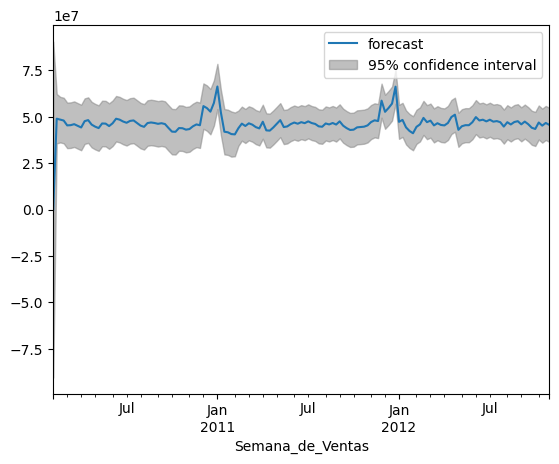

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(resultados_sarima, dynamic=False)
plt.show()

La gráfica muestra un pronóstico de ventas con un intervalo de confianza angosto al 95%, lo cual podria ser una buena señal.  

##***11. Grafique a los valores predicho de modelo vs los valores reales. ¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta.***

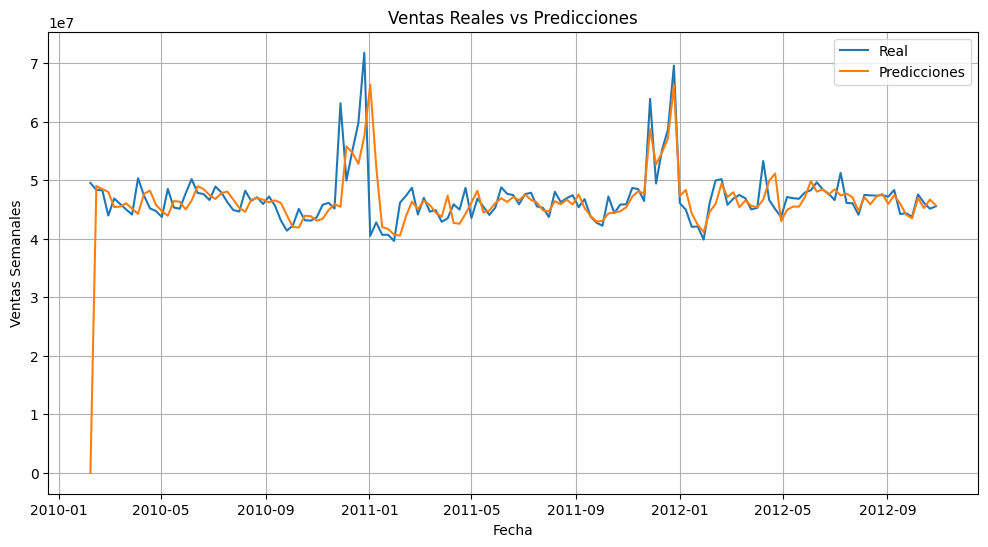

RMSE: 5539124.69447686
MAE: 2357338.8984400947


In [ ]:
# Predecir valores
predicciones = resultados_sarima.predict()

# Comparar predicciones con valores reales
plt.figure(figsize=(12, 6))
plt.plot(ventas_serie, label='Real')
plt.plot(predicciones, label='Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Ventas Semanales')
plt.title('Ventas Reales vs Predicciones')
plt.legend()
plt.grid(True)
plt.show()

# Calcular métricas de error
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(ventas_serie, predicciones, squared=False)
mae = mean_absolute_error(ventas_serie, predicciones)

print('RMSE:', rmse)
print('MAE:', mae)

**Grado de Ajuste del Modelo:**

Para evaluar el grado de ajuste del modelo SARIMA, podemos utilizar las métricas de error calculadas: RMSE (Root Mean Squared Error) y MAE (Mean Absolute Error). Un RMSE y MAE bajos indican un mejor ajuste del modelo.

Compara los valores de RMSE y MAE obtenidos con los valores de las ventas semanales para interpretar su magnitud. Si los valores de RMSE y MAE son relativamente pequeños en comparación con las ventas semanales, esto sugiere un buen ajuste del modelo.


Los valores obtenidos de RMSE (5539124.6944) y MAE (2357338.8984) son extremadamente altos. Para contextualizar, necesitas compararlos con la escala de tus Ventas Semanales. El promedio de ventas semanales es de 1046965 y dado que tanto el MAE como el RMSE sobrepasan este promedio los valores predichos no serían buenos.

La gráfica Ventas Reales vs Predicciones revela que el modelo SARIMA actual no logra capturar adecuadamente la dinámica de las ventas semanales. Si bien las predicciones parecen seguir vagamente la tendencia general de las ventas reales, se observan desviaciones significativas, especialmente en la magnitud de los picos estacionales.

Es evidente que el modelo subestima considerablemente los picos de ventas que ocurren en ciertas épocas del año, lo cual sugiere una deficiencia en la modelación de la estacionalidad. Además, existen puntos específicos donde los errores de predicción son particularmente grandes, lo que podría indicar la presencia de valores atípicos en los datos que no están siendo manejados adecuadamente por el modelo.

##***12. Concluya sobre su modelo.***

Las ventas semanales estan explicadas por componentes autorregresivos y autorregresivos estacionales, además, el resto de variables explicativas no resultaron ser relevantes para el modelo. De esta manera, para explicar las ventas semanales de los registros de WALMART es necesario dos rezagos de estas, un rezago autorregresivo estacional y una periodicidad de frecuencia estacional de 52 semanas que hay aproximadamente en un año.

Los coeficientes AR(1) y AR(2) muestran una relación positiva y de magnitud aceptable, ya que no son cercanos a cero. Es decir, cuando aumentan las ventas de hace dos semanas y de la semana pasada las ventas actuales tambien se incrementan. Los mismo sucede con el componente autorregresivo estacional ARS(1), pues al incrementarse las ventas de la semana estacional pasada se espera que las ventas de la semana actual tambien se incrementen.